## Imports

In [2]:
# Python Modules
# --------------------------------------------------
import os
import glob
import cv2
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg


# Torch Modules
# --------------------------------------------------
from torchvision import transforms


# Custom Modules
# --------------------------------------------------
import config
import utils

## Download Data

In [3]:
%%capture
if not all([
    os.path.isdir(config.TRAIN_DATA_FILEPATH),
    os.path.isdir(config.TEST_DATA_FILEPATH)
]):
    !sh load_data.sh

## Import Data

In [3]:
# Get Keyframes
# --------------------------------------------------
keypoints_frame = pd.read_csv(config.TRAIN_KEYPOINTS_PATH)


# Print Import Results
# --------------------------------------------------
image_idx  = np.random.randint(0, len(keypoints_frame))
image_name = keypoints_frame.iloc[image_idx, 0]
keypoints  = keypoints_frame.iloc[image_idx, 1:].values.astype('float').reshape(-1, 2)

print(
    f"Number of images: {keypoints_frame.shape[0]}\n"
    f"\n"
    f"Example Image name:      {image_name}\n"
    f"Example Landmarks shape: {keypoints.shape}\n"
)

Number of images: 3462

Example Image name:      Reese_Witherspoon_12.jpg
Example Landmarks shape: (68, 2)



## Visualize Keypoints

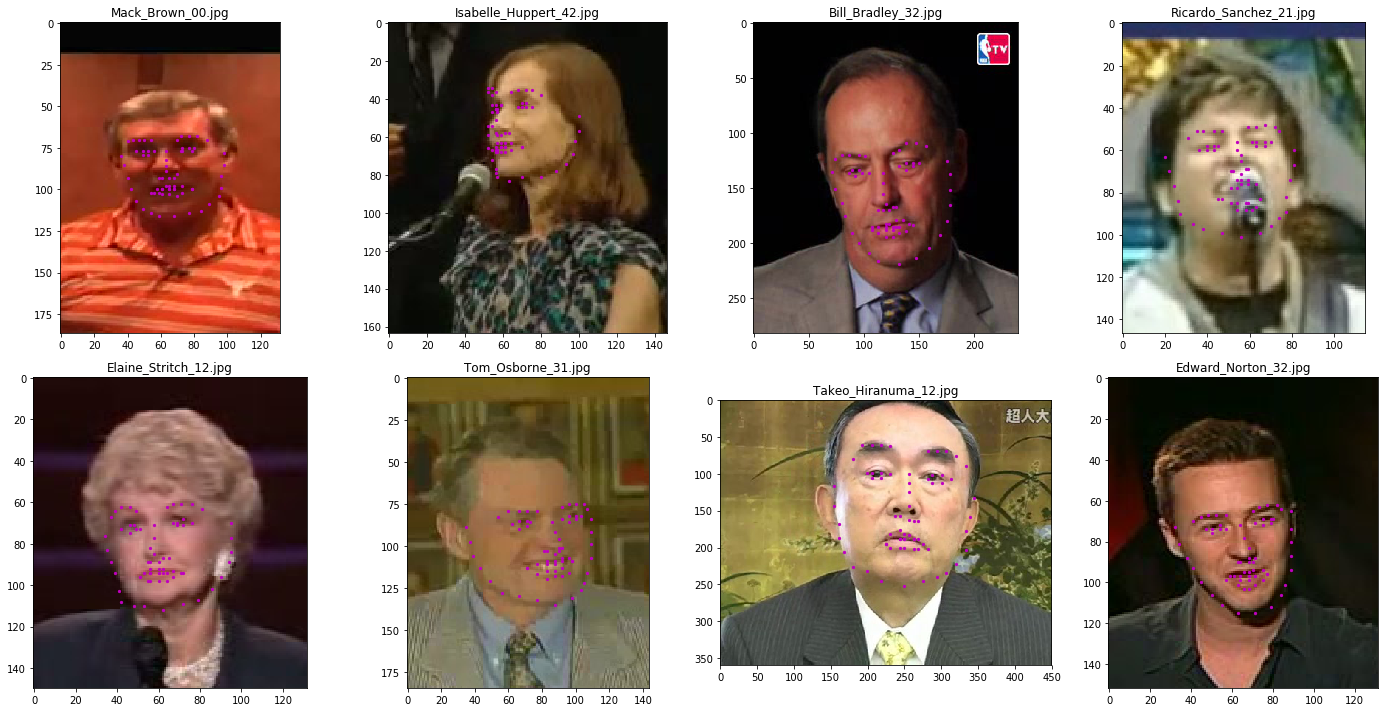

In [4]:
utils.plot_random_faces_from_dataframe(keypoints_frame)

## Load Data

In [5]:
face_dataset = utils.FacialKeypointsDataset(
    csv_file = config.TRAIN_KEYPOINTS_PATH,
    root_dir = config.TRAIN_DATA_FILEPATH
)

print(f"Length of Dataset: {len(face_dataset)}")

Length of Dataset: 3462


## Visualize Keypoints

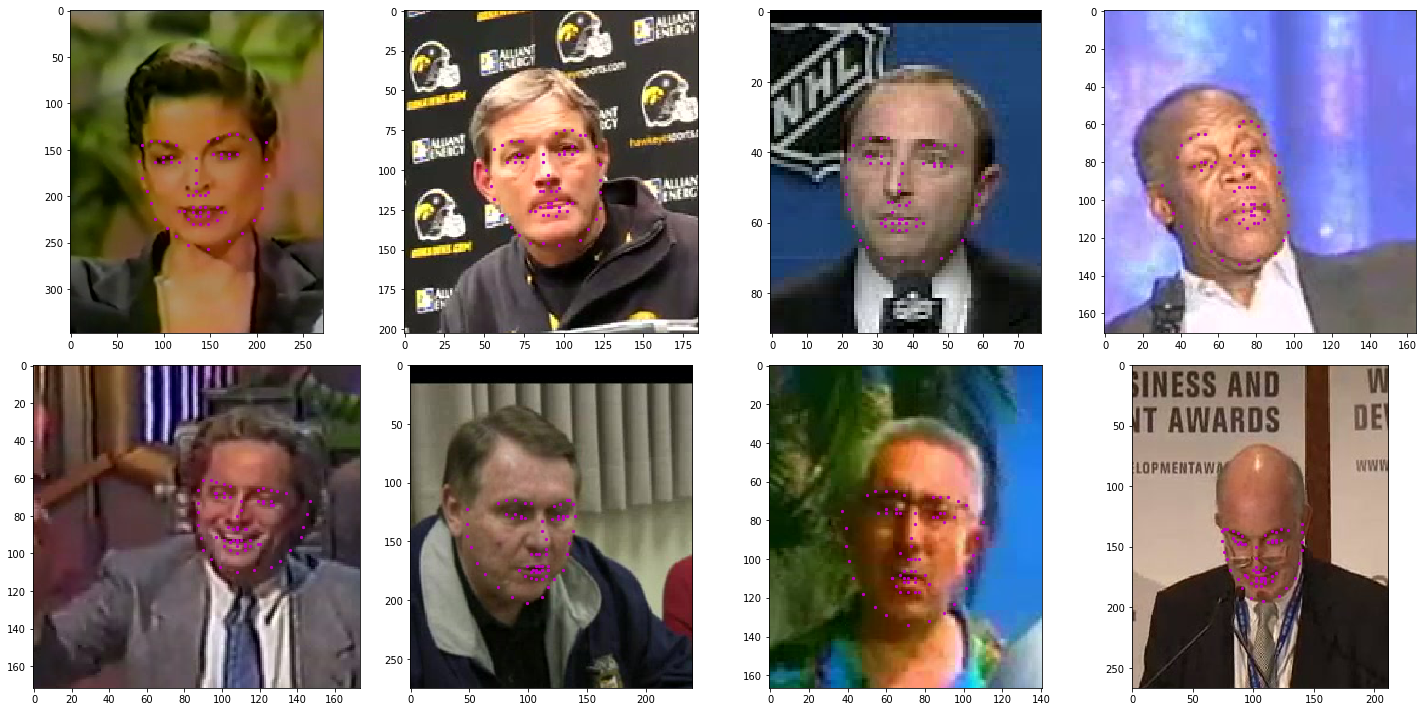

In [6]:
utils.plot_random_faces_from_dict(face_dataset)

## Transform Test

Original Image Shape: (174, 153, 3)


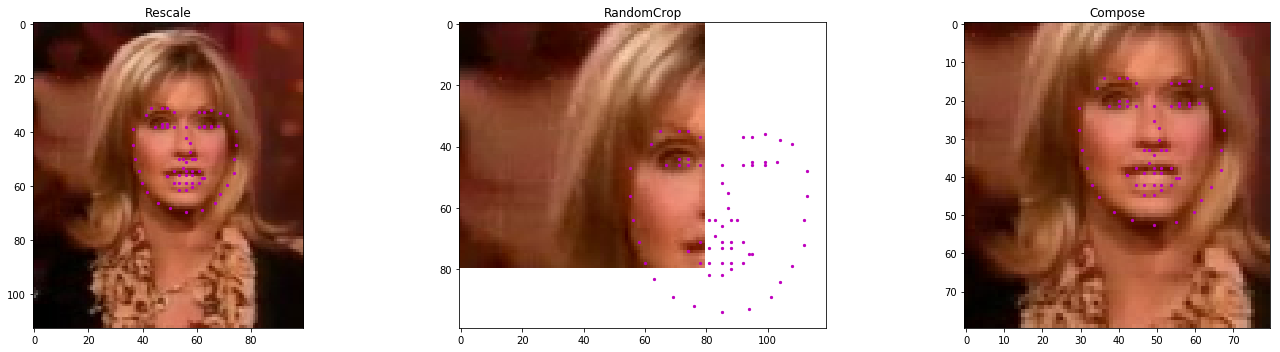

In [17]:
utils.plot_transform_test(
    face_dataset = face_dataset, 
    rescale_size = 100, 
    crop_size    = 80, 
    idx          = 500
)

## Apply Transforms to Data

In [27]:
# Transformation
# --------------------------------------------------
data_transform = transforms.Compose([
    utils.Rescale(250),
    utils.RandomCrop(224),
    utils.Normalize(),
    utils.ToTensor()
])

transformed_dataset = utils.FacialKeypointsDataset(
    csv_file  = config.TRAIN_KEYPOINTS_PATH,
    root_dir  = config.TRAIN_DATA_FILEPATH,
    transform = data_transform
)


# Check Valid Transform
# --------------------------------------------------
print(f"Number of Transformed Images: {len(transformed_dataset)}\n")

for i in range(5):
    sample = transformed_dataset[i]
    
    print(
        f"Image Index:    {i}\n"
        f"Image Size:     {sample['image'].size()}\n"
        f"Keypoints Size: {sample['keypoints'].size()}\n"
    )

Number of Transformed Images: 3462

Image Index:    0
Image Size:     torch.Size([1, 224, 224])
Keypoints Size: torch.Size([68, 2])

Image Index:    1
Image Size:     torch.Size([1, 224, 224])
Keypoints Size: torch.Size([68, 2])

Image Index:    2
Image Size:     torch.Size([1, 224, 224])
Keypoints Size: torch.Size([68, 2])

Image Index:    3
Image Size:     torch.Size([1, 224, 224])
Keypoints Size: torch.Size([68, 2])

Image Index:    4
Image Size:     torch.Size([1, 224, 224])
Keypoints Size: torch.Size([68, 2])

